股票集合: 2021年5月31日的沪深300指数中包含的300支股票  
时间范围: 2016年6月1日至2021年5月31日，共5年

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# 股票数据集

In [101]:
close = pd.read_csv("close.csv", index_col=0)
close.shape

(1215, 300)

每只股票每日的收盘股价，后复权，未开盘等原因导致不可交易的日期的元素填NAN

In [102]:
close.iloc[:,0:6].tail()

,000001,000002,000063,000066,000069,000100
tradeDate,,,,,,
2021-05-25,24.60,26.76,29.91,15.66,8.276,8.31
2021-05-26,25.01,27.18,29.76,14.77,8.286,8.22
2021-05-27,24.79,27.16,30.54,14.65,8.142,8.36
2021-05-28,24.50,26.95,31.37,15.13,7.961,8.12
2021-05-31,24.20,26.70,31.44,15.28,7.970,8.08


前六只股票的每日收盘股价图，其中空缺段为未开盘时间

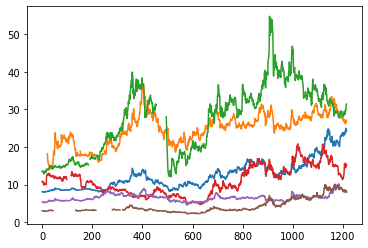

In [103]:
plt.plot(close.iloc[:,0:6].values);

# 计算收益率矩阵与因子矩阵

## 未来5日收益率

In [104]:
r = close.shift(-5) / close - 1
r.describe()

,000001,000002,000063,000066,000069,000100,000157,000166,000333,000338,...,603658,603799,603833,603899,603986,603993,688008,688009,688012,688036
count,1210.000000,1179.000000,1147.000000,1179.000000,1210.000000,1028.000000,1210.000000,1180.000000,1159.000000,1206.000000,...,1146.000000,1190.000000,1000.000000,1210.000000,929.000000,1210.000000,446.000000,446.000000,446.000000,397.000000
mean,0.005668,0.003594,0.006871,0.003802,0.002808,0.006282,0.005878,-0.000079,0.007349,0.008105,...,0.009488,0.011469,0.006387,0.007522,0.019371,0.003583,0.000574,-0.005111,0.010429,0.020786
std,0.046039,0.054454,0.069577,0.073835,0.047609,0.059371,0.047523,0.039893,0.044333,0.048954,...,0.075275,0.088607,0.059387,0.043401,0.115521,0.068793,0.082955,0.052364,0.109187,0.101907
min,-0.194517,-0.169192,-0.409532,-0.258529,-0.184661,-0.175105,-0.208280,-0.146895,-0.167804,-0.172030,...,-0.180151,-0.267100,-0.167234,-0.156657,-0.288956,-0.210110,-0.220090,-0.279287,-0.238864,-0.255823
25%,-0.020128,-0.027993,-0.029883,-0.043080,-0.023057,-0.028390,-0.017750,-0.018389,-0.021793,-0.023511,...,-0.029511,-0.045562,-0.026920,-0.020410,-0.046074,-0.037268,-0.046412,-0.025785,-0.061258,-0.048910
50%,0.002957,0.000346,0.005365,-0.003418,0.000000,0.002755,0.001605,-0.001866,0.006378,0.007497,...,0.006433,0.006486,0.003846,0.007263,0.005469,-0.002381,-0.002987,-0.005057,-0.007656,0.012593
75%,0.029744,0.031188,0.039622,0.040563,0.024919,0.034558,0.024734,0.015115,0.034267,0.036467,...,0.041688,0.068286,0.041892,0.033715,0.071628,0.035700,0.042417,0.015228,0.067461,0.079655
max,0.225039,0.273703,0.366152,0.368521,0.409428,0.290289,0.285360,0.357715,0.186319,0.296177,...,0.611020,0.337619,0.610507,0.145625,0.610926,0.396974,0.417856,0.289684,0.697056,0.381221


前两只股票的未来5日收益率图

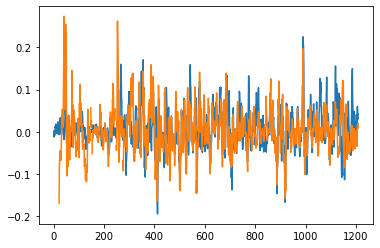

In [105]:
plt.plot(r.iloc[:,0:2].values);

## 过去收益率

In [106]:
r0 = close.pct_change()
r0.describe()

,000001,000002,000063,000066,000069,000100,000157,000166,000333,000338,...,603658,603799,603833,603899,603986,603993,688008,688009,688012,688036
count,1214.000000,1193.000000,1214.000000,1214.000000,1214.000000,1214.000000,1214.000000,1214.000000,1214.000000,1214.000000,...,1150.000000,1214.000000,1015.000000,1214.000000,1160.000000,1214.000000,450.000000,450.000000,450.000000,401.000000
mean,0.001099,0.000596,0.001113,0.000760,0.000520,0.001124,0.001136,-0.000019,0.001345,0.001627,...,0.001966,0.002150,0.001402,0.001494,0.003363,0.000737,0.000244,-0.001309,0.002132,0.003900
std,0.019686,0.023602,0.028743,0.030760,0.019706,0.025196,0.020029,0.016685,0.020841,0.022392,...,0.029630,0.037536,0.026059,0.021027,0.037002,0.029333,0.038246,0.025082,0.046613,0.046414
min,-0.099736,-0.100077,-0.100170,-0.100267,-0.100326,-0.100718,-0.100081,-0.099495,-0.099987,-0.099834,...,-0.100055,-0.100076,-0.092320,-0.099998,-0.100037,-0.100061,-0.199958,-0.198230,-0.180390,-0.161777
25%,-0.008829,-0.011303,-0.012372,-0.015594,-0.010623,-0.010596,-0.008079,-0.007334,-0.010404,-0.011352,...,-0.013737,-0.018998,-0.014028,-0.010742,-0.015420,-0.015341,-0.018936,-0.010064,-0.023306,-0.025261
50%,0.000000,-0.000842,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000219,0.000000,...,-0.000042,0.001569,-0.000500,0.000298,0.000000,0.000000,0.000947,-0.001451,0.000756,0.002712
75%,0.009854,0.009913,0.012713,0.014191,0.010103,0.011466,0.009151,0.006262,0.012309,0.012582,...,0.015836,0.021642,0.016265,0.012540,0.017771,0.013495,0.020106,0.007763,0.022365,0.026162
max,0.100361,0.100169,0.100132,0.100527,0.100688,0.101543,0.100467,0.100645,0.100163,0.100091,...,0.100192,0.100156,0.100050,0.091421,0.100085,0.101075,0.200004,0.145573,0.182036,0.177637


前两只股票的过去收益率图

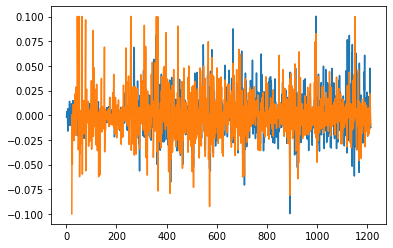

In [107]:
plt.plot(r0.iloc[:,0:2].values);

对未来5日收益率以及过去收益率分别进行ADF检验，检验其时序平稳性

In [108]:
from statsmodels.tsa import stattools

print(stattools.adfuller(r.dropna()['000001'],0))
print(stattools.adfuller(r.dropna()['000002'],0))
print(stattools.adfuller(r0.dropna()['000001'],0))
print(stattools.adfuller(r0.dropna()['000002'],0))

(-5.436784301390241, 2.8339374314168254e-06, 0, 122, {'1%': -3.4851223522012855, '5%': -2.88553750045158, '10%': -2.5795685622144586}, -479.74794902707845)
(-5.741442727966363, 6.262019013947811e-07, 0, 122, {'1%': -3.4851223522012855, '5%': -2.88553750045158, '10%': -2.5795685622144586}, -512.0764366770153)
(-14.680557808579715, 3.161086679451827e-27, 0, 223, {'1%': -3.460018927623594, '5%': -2.8745897386146817, '10%': -2.57372514086348}, -1015.4729053365018)
(-14.48299039396034, 6.3275600406356144e-27, 0, 223, {'1%': -3.460018927623594, '5%': -2.8745897386146817, '10%': -2.57372514086348}, -1142.2858928283254)


根据ADF检验结果，对于r与r0而言，均不能拒绝原假设  
故可以认为股票的收益率近乎平稳

## factor1

对于每只股票每日，取出最近10日(含当日，后同)的r0，将其中非NAN的元素求平均

In [109]:
factor1 = r0.rolling(10, min_periods=1).mean()
print(factor1.shape)
factor1.head()

(1215, 300)


,000001,000002,000063,000066,000069,000100,000157,000166,000333,000338,...,603658,603799,603833,603899,603986,603993,688008,688009,688012,688036
tradeDate,,,,,,,,,,,,,,,,,,,,,
2016-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-06-02,-0.001862,NaN,0.004397,0.011918,0.003172,0.000000,-0.002319,0.003623,-0.013125,-0.003585,...,NaN,-0.002748,NaN,-0.002115,NaN,0.065747,NaN,NaN,NaN,NaN
2016-06-03,0.000934,NaN,0.008358,0.000070,0.003818,-0.002970,0.000003,0.003014,0.004956,0.002555,...,NaN,-0.051022,NaN,-0.000806,NaN,0.024044,NaN,NaN,NaN,NaN
2016-06-06,0.000953,NaN,0.006280,-0.002995,0.001558,0.000012,-0.000771,-0.001191,0.012690,-0.001666,...,NaN,-0.025088,NaN,-0.002488,NaN,0.016828,NaN,NaN,NaN,NaN
2016-06-07,0.000962,NaN,0.001492,-0.004313,0.000797,-0.002961,-0.001159,-0.000893,0.003195,-0.002150,...,NaN,-0.011383,NaN,0.000418,NaN,0.014295,NaN,NaN,NaN,NaN


前两只股票的一号因子图

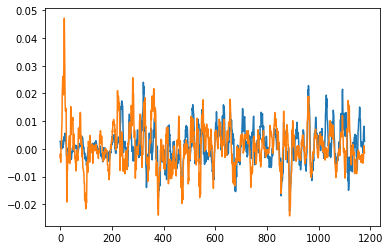

In [110]:
plt.plot(factor1.iloc[36:,0:2].values);

In [111]:
print(stattools.adfuller(factor1.dropna()['000001'],0))
print(stattools.adfuller(factor1.dropna()['000002'],0))

(-3.6184049963798577, 0.005418756984157796, 0, 223, {'1%': -3.460018927623594, '5%': -2.8745897386146817, '10%': -2.57372514086348}, -1910.272150787997)
(-3.3328077804983685, 0.013474161533203624, 0, 223, {'1%': -3.460018927623594, '5%': -2.8745897386146817, '10%': -2.57372514086348}, -2030.3261379883907)


## factor2

对于每只股票每日，取出当日所有股票的r0，求该股票的r0在所有非NAN的元素中排第几，并除以非NAN的元素的个数

In [112]:
factor2 = r0.rank(axis=1, pct=True)
factor2.head()

,000001,000002,000063,000066,000069,000100,000157,000166,000333,000338,...,603658,603799,603833,603899,603986,603993,688008,688009,688012,688036
tradeDate,,,,,,,,,,,,,,,,,,,,,
2016-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-06-02,0.279167,NaN,0.625000,0.804167,0.566667,0.406250,0.241667,0.583333,0.029167,0.183333,...,NaN,0.212500,NaN,0.245833,NaN,0.991667,NaN,NaN,NaN,NaN
2016-06-03,0.541667,NaN,0.729167,0.091667,0.595833,0.175000,0.466667,0.479167,0.837500,0.683333,...,NaN,0.004167,NaN,0.358333,NaN,0.058333,NaN,NaN,NaN,NaN
2016-06-06,0.630705,NaN,0.668050,0.236515,0.489627,0.755187,0.518672,0.207469,0.933610,0.170124,...,NaN,0.921162,NaN,0.373444,NaN,0.684647,NaN,NaN,NaN,NaN
2016-06-07,0.599174,NaN,0.099174,0.198347,0.462810,0.115702,0.417355,0.539256,0.016529,0.384298,...,NaN,0.971074,NaN,0.842975,NaN,0.814050,NaN,NaN,NaN,NaN


前两只股票的二号因子图

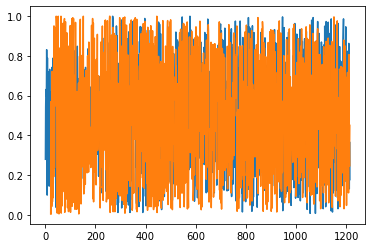

In [113]:
plt.plot(factor2.iloc[:,0:2].values);

In [114]:
print(stattools.adfuller(factor2.dropna()['000001'],0))
print(stattools.adfuller(factor2.dropna()['000002'],0))

(-14.86332185487916, 1.706168561498824e-27, 0, 223, {'1%': -3.460018927623594, '5%': -2.8745897386146817, '10%': -2.57372514086348}, 93.36271995751594)
(-14.54410612749326, 5.0897330619616826e-27, 0, 223, {'1%': -3.460018927623594, '5%': -2.8745897386146817, '10%': -2.57372514086348}, 41.882778593724254)


## factor3

对于每只股票每日，取出最近10日的r0，求当日的r0在所有非NAN的元素中排第几，并除以非NAN的元素的个数

In [115]:
def rank(array):
    s = pd.Series(array)
    n = s.count()
    return s.rank()[n-1]/n
factor3 = r0.fillna(0).rolling(window=10, min_periods=1).apply(rank)

In [116]:
factor3.head()

,000001,000002,000063,000066,000069,000100,000157,000166,000333,000338,...,603658,603799,603833,603899,603986,603993,688008,688009,688012,688036
tradeDate,,,,,,,,,,,,,,,,,,,,,
2016-06-01,1.00,1.000000,1.0,1.000000,1.00,1.000000,1.000,1.000000,1.0,1.00,...,1.000000,1.000000,1.000000,1.00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2016-06-02,0.50,0.750000,1.0,1.000000,1.00,0.750000,0.500,1.000000,0.5,0.50,...,0.750000,0.500000,0.750000,0.50,0.750000,1.000000,0.750000,0.750000,0.750000,0.750000
2016-06-03,1.00,0.666667,1.0,0.333333,1.00,0.333333,1.000,0.666667,1.0,1.00,...,0.666667,0.333333,0.666667,1.00,0.666667,0.333333,0.666667,0.666667,0.666667,0.666667
2016-06-06,0.75,0.625000,0.5,0.500000,0.25,1.000000,0.375,0.250000,1.0,0.25,...,0.625000,1.000000,0.625000,0.25,0.625000,0.750000,0.625000,0.625000,0.625000,0.625000
2016-06-07,0.60,0.600000,0.2,0.600000,0.40,0.200000,0.200,0.500000,0.2,0.40,...,0.600000,1.000000,0.600000,1.00,0.600000,0.800000,0.600000,0.600000,0.600000,0.600000


前两只股票的三号因子图

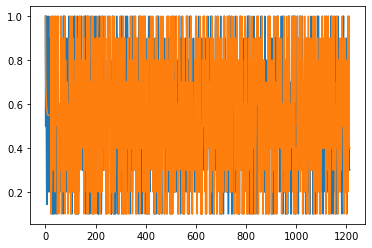

In [117]:
plt.plot(factor3.iloc[:,0:2].values);

In [118]:
print(stattools.adfuller(factor3.dropna()['000001'],0))
print(stattools.adfuller(factor3.dropna()['000002'],0))

(-34.526281572336416, 0.0, 0, 1214, {'1%': -3.4357480073434905, '5%': -2.863923702481129, '10%': -2.568039121778048}, 409.20235910730025)
(-34.15191055271258, 0.0, 0, 1214, {'1%': -3.4357480073434905, '5%': -2.863923702481129, '10%': -2.568039121778048}, 377.08882997754745)


## factor4

对于每只股票每日，取出最近10日的r0，NAN的元素填充0，由近到远按[1, 0.9, ..., 0.1]加权求和

In [119]:
w = np.linspace(1, 0.1, 10,-1)
factor4 = r0.fillna(0).rolling(window=10).apply(lambda x: np.dot(x,w))

In [120]:
factor4.tail()

,000001,000002,000063,000066,000069,000100,000157,000166,000333,000338,...,603658,603799,603833,603899,603986,603993,688008,688009,688012,688036
tradeDate,,,,,,,,,,,,,,,,,,,,,
2021-05-25,0.011564,-0.027319,0.022487,0.177137,-0.028293,-0.009008,-0.025121,0.017455,0.009268,0.005969,...,0.064335,0.066459,-0.004393,0.033134,0.040688,-0.051575,0.063118,-0.003268,0.100777,0.043038
2021-05-26,0.017706,-0.005320,0.021737,0.204576,-0.007129,-0.001942,-0.012403,0.016491,0.031876,0.008500,...,0.063228,0.094916,0.016118,0.043919,0.024136,-0.060079,0.055816,-0.004818,0.097176,0.057619
2021-05-27,0.046234,0.001348,0.043926,0.174213,0.003329,0.037497,0.011815,0.020293,0.070504,0.036055,...,0.076347,0.180251,0.057456,0.033586,0.051623,-0.001653,0.006174,-0.007760,0.082841,0.072119
2021-05-28,0.032557,-0.006081,0.019705,0.195720,-0.014394,-0.003732,-0.016115,-0.023314,0.061170,0.003462,...,0.016214,0.189442,0.051424,0.026144,0.033980,0.005187,0.021834,-0.011900,0.016072,0.034790
2021-05-31,0.023233,-0.009402,0.024997,0.166310,-0.003925,-0.011543,-0.030701,0.010392,0.038940,-0.009630,...,-0.015459,0.112438,-0.042088,-0.030974,0.030331,-0.026115,0.037723,-0.001672,0.032623,0.042052


前两只股票的四号因子图

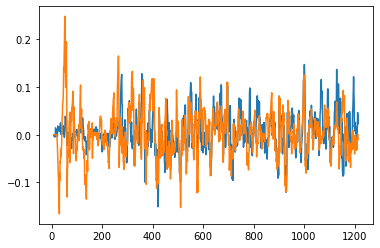

In [121]:
plt.plot(factor4.iloc[:,0:2].values);

In [122]:
print(stattools.adfuller(factor4.dropna()['000001'],0))
print(stattools.adfuller(factor4.dropna()['000002'],0))

(-9.472832482731805, 4.062805575021197e-16, 0, 1205, {'1%': -3.4357884107845953, '5%': -2.863941528023427, '10%': -2.56804861503762}, -6009.08441733285)
(-9.22228122791285, 1.7667655232620045e-15, 0, 1205, {'1%': -3.4357884107845953, '5%': -2.863941528023427, '10%': -2.56804861503762}, -5588.331242868604)


因子覆盖率

In [123]:
factors = {
    "factor1": factor1,
    "factor2": factor2,
    "factor3": factor3,
    "factor4": factor4,
}
for name, factor in factors.items():
    print(f"{name}: coverage={factor.count().mean() / factor.shape[0]}")

factor1: coverage=0.9297475994513033
factor2: coverage=0.9297475994513033
factor3: coverage=1.0
factor4: coverage=0.9925925925925926


# 因子择优

## 计算因子与未来5日收益率的Information Coefficient

In [124]:
ic = [[] for _ in range(4)]
for i in range(len(r)):
    ic[0].append(r.iloc[i].corr(factor1.iloc[i]))
for i in range(len(r)):
    ic[1].append(r.iloc[i].corr(factor2.iloc[i]))
for i in range(len(r)):
    ic[2].append(r.iloc[i].corr(factor3.iloc[i]))
for i in range(len(r)):
    ic[3].append(r.iloc[i].corr(factor4.iloc[i]))
ic = pd.DataFrame(ic)
ic = ic.T
ic.rename(columns={0:'factor1',1:'factor2',2:'factor3',3:'factor4'},inplace=True)
ic.describe()

,factor1,factor2,factor3,factor4
count,1209.000000,1209.000000,1209.000000,1201.000000
mean,0.099137,0.008915,0.001208,0.051869
std,0.240153,0.149889,0.136731,0.188880
min,-0.516808,-0.503954,-0.433052,-0.473946
25%,-0.071923,-0.089178,-0.088910,-0.075620
50%,0.071223,0.013594,0.003355,0.037719
75%,0.242732,0.110630,0.087259,0.170035
max,0.765478,0.550544,0.636060,0.708238


选出abs(mean(IC))最高的一个因子用于之后的历史模拟回测  
若该因子的mean(IC)为负数，则将其整个factor取相反数  

选择factor1作为其中的最优因子

## 因子处理

对所选factor的每一个 “横截面” 依次完成两步预处理  
去极值: 统计2%分位数作为下界，统计98%分位数作为上界，所有超过上界数赋值为上界，所有低于下界的数赋值为下界  
标准化: 求z-score，即减均值除标准差

In [125]:
factor = factor1.copy(deep=True)
lower = factor.quantile(0.02, axis=1)
upper = factor.quantile(0.98, axis=1)
factor = factor.clip(lower=lower, upper=upper, axis=0)
mean = factor.mean(axis=1)
std = factor.std(axis=1)
factor = factor.sub(mean, axis=0).div(std, axis=0)

In [126]:
factor.head()

,000001,000002,000063,000066,000069,000100,000157,000166,000333,000338,...,603658,603799,603833,603899,603986,603993,688008,688009,688012,688036
tradeDate,,,,,,,,,,,,,,,,,,,,,
2016-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-06-02,-0.583645,NaN,-0.028331,0.638930,-0.137085,-0.418485,-0.624221,-0.097078,-1.583011,-0.736586,...,NaN,-0.662259,NaN,-0.606103,NaN,3.093998,NaN,NaN,NaN,NaN
2016-06-03,-0.494567,NaN,0.220773,-0.577826,-0.216728,-0.870808,-0.584329,-0.294116,-0.107071,-0.338371,...,NaN,-2.207313,NaN,-0.662291,NaN,1.732255,NaN,NaN,NaN,NaN
2016-06-06,-0.426229,NaN,0.237260,-0.917921,-0.350951,-0.543462,-0.640979,-0.693281,1.035548,-0.752371,...,NaN,-1.233558,NaN,-0.854855,NaN,1.550893,NaN,NaN,NaN,NaN
2016-06-07,-0.344304,NaN,-0.263966,-1.144748,-0.369426,-0.939626,-0.666223,-0.625851,-0.005495,-0.816526,...,NaN,-1.433540,NaN,-0.426834,NaN,1.678528,NaN,NaN,NaN,NaN


由于因子计算过程可能导致前10天中有较多NAN，跳过前10天的数据

In [127]:
close = close.iloc[10:, :]
factor = factor.iloc[10:, :]
print(close.shape)

(1205, 300)


# 历史模拟回测

## 回测函数

In [128]:
def transaction(close,factor):
    holding = pd.DataFrame(0.0, index=close.index, columns=close.columns)
    for i in range(holding.shape[0]):
        p = close.iloc[i]
        if i == 0:
            cash = 1
        else:
            s = holding.iloc[i - 1].copy()
            cash = (s * p).sum()
            s[~p.isna()] = 0
            holding.iloc[i] += s
        mask = (factor.iloc[i] > 0) & (~p.isna())
        holding.iloc[i] += (cash * mask / mask.sum() / p).fillna(0)
    return holding

holding = transaction(close,factor)

## 计算每日持仓的资产价值并画图

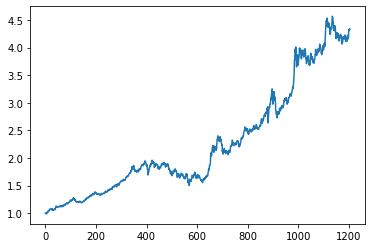

In [129]:
equity = (holding * close.ffill()).sum(axis=1)
plt.plot(equity.values);

## 基于持仓资产分析策略表现

In [130]:
daily_return = equity.pct_change()
print(f"日化收益率={daily_return.mean()}")
print(f"年化收益率={daily_return.mean() * 250}")
print(f"最大回撤率={(equity / equity.cummax() - 1).min()}")
daily_sharp = daily_return.mean() / daily_return.std()
print(f"年化夏普比率={daily_sharp * (250 ** 0.5)}")

日化收益率=0.001303157363323164
年化收益率=0.37920076648262796
最大回撤率=-0.2342157439122904
年化夏普比率=1.5940686539080746


# 总结

In [10]:
class tactic():
    def __init__(self,close):
        if not isinstance(close,pd.DataFrame):      
            raise TypeError('类型错误')
        self.close = close
        self.r0 = close.pct_change()
        self.r = close.shift(-5) / close - 1
    def get_factor(self):
        factor = self.r0.rolling(10, min_periods=1).mean()
        return factor
    def z_factor(self):
        factor = self.get_factor()
        lower = factor.quantile(0.02, axis=1)
        upper = factor.quantile(0.98, axis=1)
        factor = factor.clip(lower=lower, upper=upper, axis=0)
        mean = factor.mean(axis=1)
        std = factor.std(axis=1)
        factor = factor.sub(mean, axis=0).div(std, axis=0)
        return factor
    def backtrac(self):
        close = self.close.iloc[10:, :]
        factor = self.z_factor().iloc[10:, :]
        holding = pd.DataFrame(0.0, index=close.index, columns=close.columns)
        for i in range(holding.shape[0]):
            p = close.iloc[i]
            if i == 0:
                cash = 1
            else:
                s = holding.iloc[i - 1].copy()
                cash = (s * p).sum()
                s[~p.isna()] = 0
                holding.iloc[i] += s
            mask = (factor.iloc[i] > 0) & (~p.isna())
            holding.iloc[i] += (cash * mask / mask.sum() / p).fillna(0)
        return holding
    def get_equity(self):
        close = self.close.iloc[10:, :]
        holding = self.backtrac()
        equity = (holding * close.ffill()).sum(axis=1)
        return equity
    def show_equity(self):
        equity = self.get_equity()
        plt.plot(equity.values)
    def score(self):
        equity = self.get_equity()
        daily_return = equity.pct_change()
        print(f"日化收益率={daily_return.mean()}")
        print(f"年化收益率={daily_return.mean() * 250}")
        print(f"最大回撤率={(equity / equity.cummax() - 1).min()}")
        daily_sharp = daily_return.mean() / daily_return.std()
        print(f"年化夏普比率={daily_sharp * (250 ** 0.5)}")

In [23]:
eco = pd.read_csv('金融板块股票.csv')
inter = pd.read_csv('计算机行业股票.csv')

In [24]:
data = inter[['Date','Adj Close','name']]
data.shape

(2013, 3)

In [25]:
close = pd.pivot_table(data,index='Date',columns='name',values='Adj Close')
close.head()

name,002389.SZ,300661.SZ,300747.SZ,300782.SZ,600118.SS,603025.SS,603290.SS,603893.SS,688981.SS
Date,,,,,,,,,
2020-01-02,11.29,171.30,79.32,226.99,21.50,9.25,NaN,NaN,NaN
2020-01-03,11.56,162.45,77.53,218.98,22.10,9.16,NaN,NaN,NaN
2020-01-06,12.72,159.65,78.07,214.44,22.26,9.02,NaN,NaN,NaN
2020-01-07,13.99,155.52,78.11,209.44,22.46,9.18,NaN,NaN,NaN
2020-01-08,15.10,159.78,77.27,226.52,22.99,8.89,NaN,NaN,NaN


In [26]:
t = tactic(close)

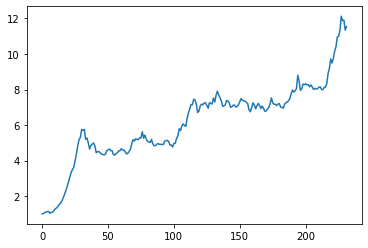

In [27]:
t.show_equity()

In [28]:
t.score()

日化收益率=0.011319563567367692
年化收益率=2.829890891841923
最大回撤率=-0.25151575935052184
年化夏普比率=4.8267892490399875
